In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]

In [20]:
df = pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+")

In [21]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


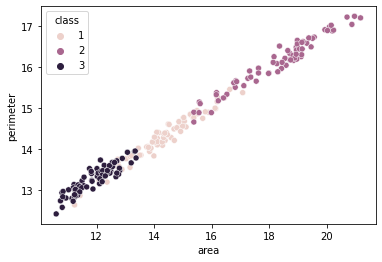

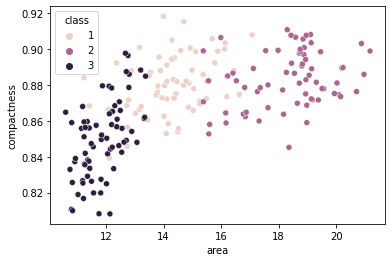

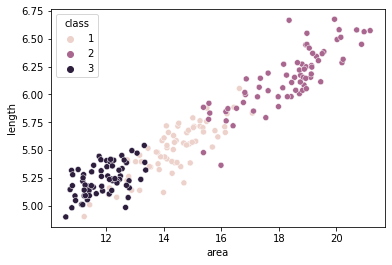

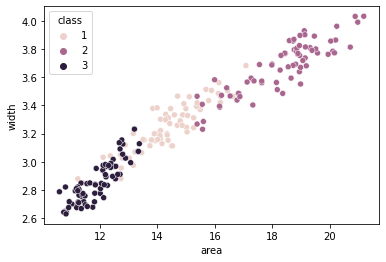

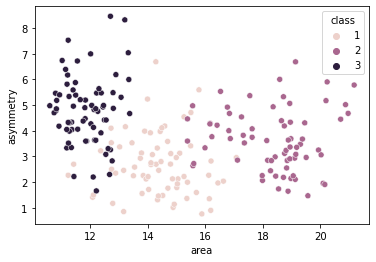

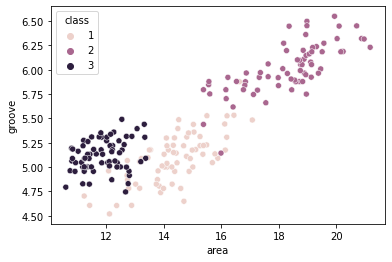

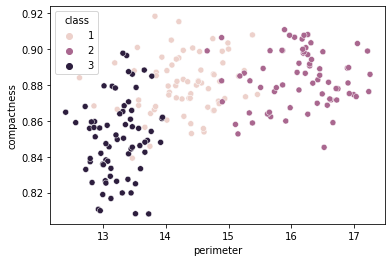

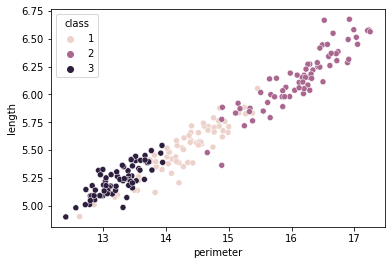

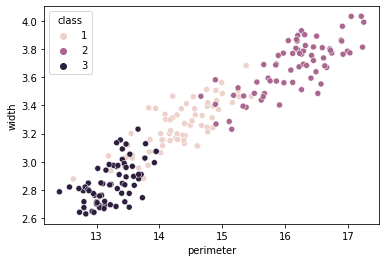

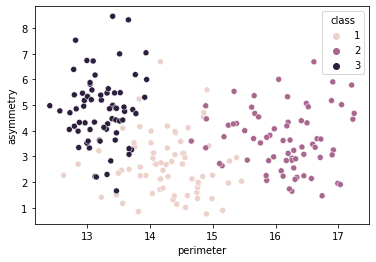

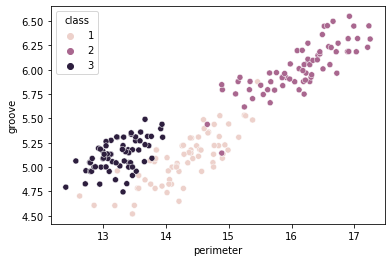

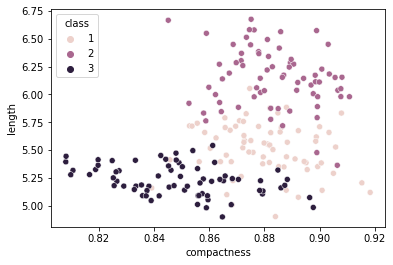

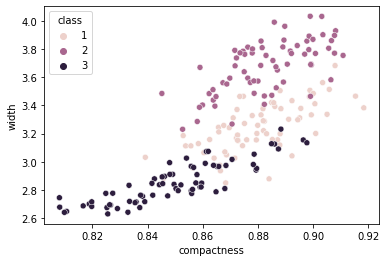

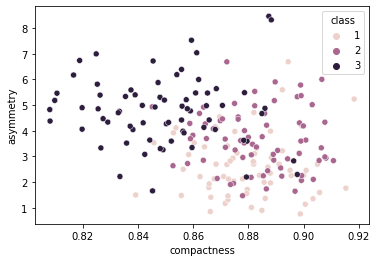

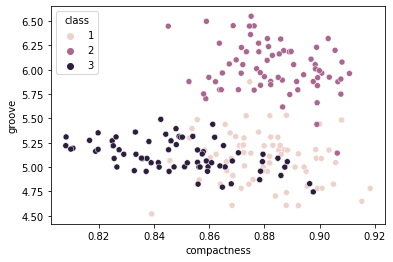

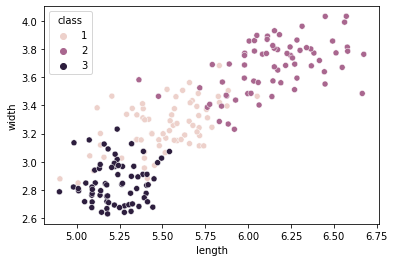

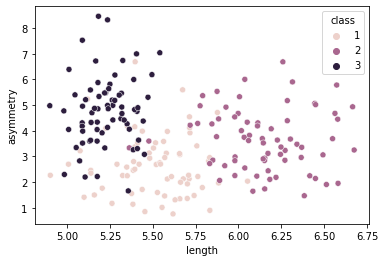

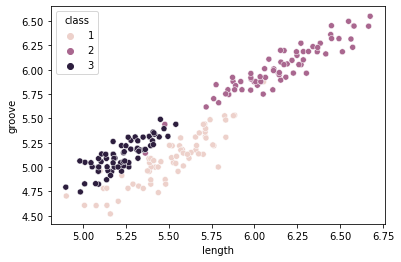

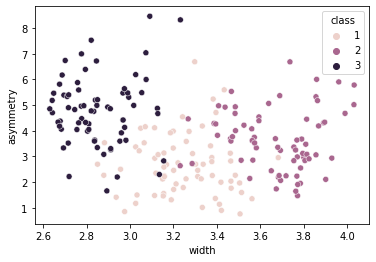

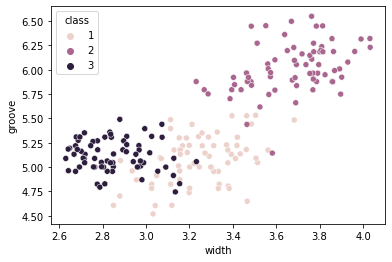

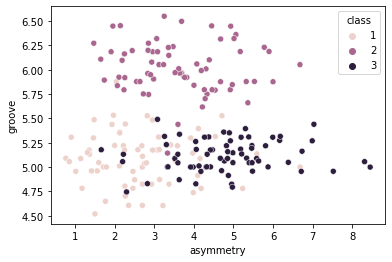

In [22]:
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):

        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.show()


# K Means Clustering

In [23]:
from sklearn.cluster import KMeans

In [24]:
x = "perimeter"
y = "asymmetry"
X = df[[x,y]].values

In [25]:
kmeans = KMeans(n_clusters=3).fit(X)

In [26]:
clusters = kmeans.labels_

In [27]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [28]:
df["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [29]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns = [x,y,"class"])

[]

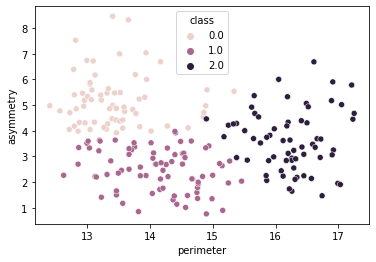

In [30]:
sns.scatterplot(x=x, y=y, hue="class", data=cluster_df)
plt.plot()

[]

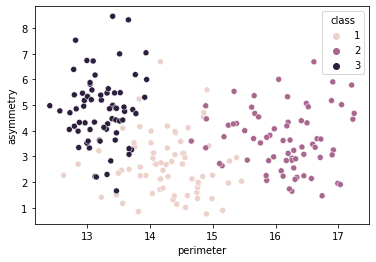

In [31]:
sns.scatterplot(x=x, y=y, hue="class", data=df)
plt.plot()

# Higher Dimensions

In [33]:
X = df[cols[:-1]].values

In [36]:
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1,1))), columns = cols)

[]

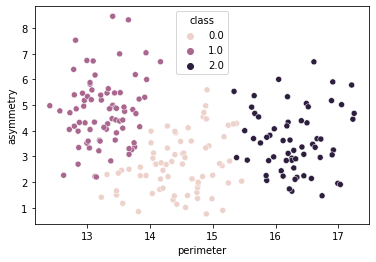

In [37]:
sns.scatterplot(x=x, y=y, hue="class", data=cluster_df)
plt.plot()

# PCA

In [38]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [39]:
X.shape

(210, 7)

In [42]:
transformed_x.shape

(210, 2)

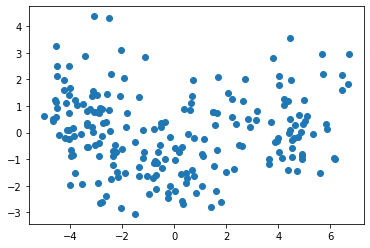

In [45]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [47]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))), columns=["pca1", "pca2", "class"])

In [48]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1,1))), columns=["pca1", "pca2", "class"])

[]

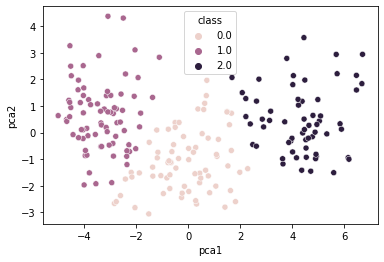

In [50]:
# K means classes

sns.scatterplot(x="pca1", y="pca2", hue="class", data=kmeans_pca_df)
plt.plot()

[]

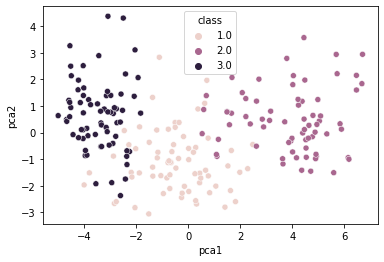

In [51]:
# Actual classes

sns.scatterplot(x="pca1", y="pca2", hue="class", data=truth_pca_df)
plt.plot()